<a href="https://colab.research.google.com/github/thezachdrake/UMD-INST760-Summer2024/blob/main/Khawaja_notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Is there a relationship between a university's international outlook (as measured by International Faculty and International Students scores) and its overall academic performance (as measured by Academic Reputation and Citations per Faculty scores)?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import os
print(os.getcwd())
from google.colab import drive
drive.mount('/content/drive')

/content
Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/My Drive/data.csv')


# Calculate International Outlook score (average of International Faculty and International Students)


In [9]:
df['International Outlook'] = (df['International Faculty'] + df['International Students']) / 2

# Calculate Academic Performance score (average of Academic Reputation and Citations per Faculty)


In [10]:
df['Academic Performance'] = (df['Academic Reputation'] + df['Citations per Faculty']) / 2

**Scatter Plot**

Text(0, 0.5, 'Academic Performance Score')

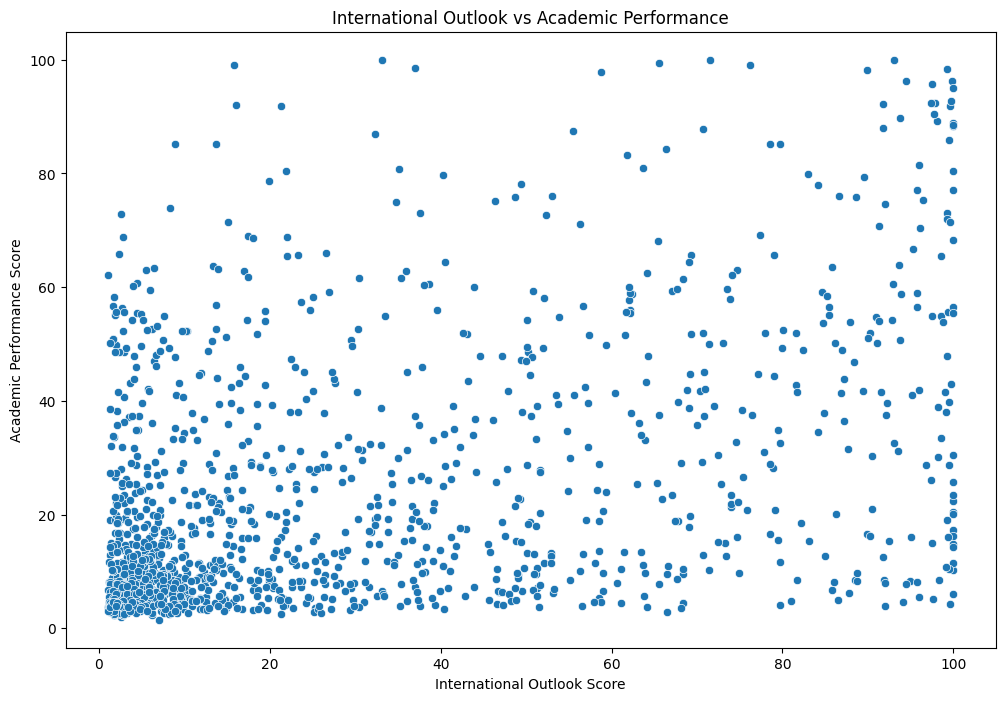

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='International Outlook', y='Academic Performance', data=df)
plt.title('International Outlook vs Academic Performance')
plt.xlabel('International Outlook Score')
plt.ylabel('Academic Performance Score')


> This needs to have some third dimension to it. Right now it appears that there is not pattern at all. Is this the case by size? Country? using color/size to add a third dimension would let us see changes in patterns.

103
0
International Outlook    float64
Academic Performance     float64
dtype: object


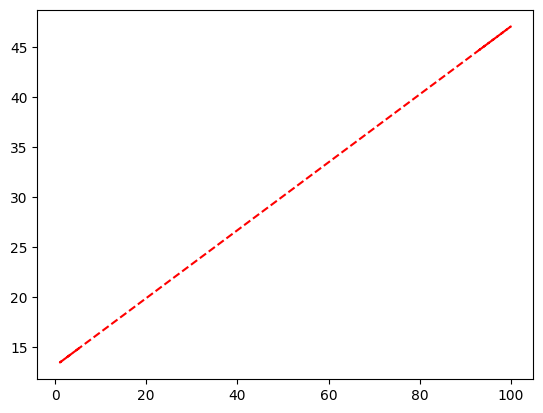

In [12]:
print(df['International Outlook'].isnull().sum())
print(df['Academic Performance'].isnull().sum())
print(df[['International Outlook', 'Academic Performance']].dtypes)

df = df.dropna(subset=['International Outlook', 'Academic Performance'])


z = np.polyfit(df['International Outlook'], df['Academic Performance'], 1)
p = np.poly1d(z)
plt.plot(df['International Outlook'], p(df['International Outlook']), "r--")

> This would have been better as an overlay on the other plot. Look up adding a line to a scatter in seaborn. 

In [13]:
correlation = df['International Outlook'].corr(df['Academic Performance'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.tight_layout()
plt.savefig('international_vs_academic.png')
plt.close()

In [14]:
r, p_value = stats.pearsonr(df['International Outlook'], df['Academic Performance'])

print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.46550050467411763
P-value: 3.3069788802008744e-76


In [15]:
df['Outlier'] = (
    (df['International Outlook'] > df['International Outlook'].mean() + 2*df['International Outlook'].std()) |
    (df['Academic Performance'] > df['Academic Performance'].mean() + 2*df['Academic Performance'].std())
)

outliers = df[df['Outlier']]
print("\nOutliers:")
print(outliers[['Institution Name', 'International Outlook', 'Academic Performance']])


Outliers:
                                 Institution Name  International Outlook  \
0    Massachusetts Institute of Technology (MIT)                   93.05   
1                         Imperial College London                  99.80   
2                            University of Oxford                  97.90   
3                              Harvard University                  71.55   
4                         University of Cambridge                  97.40   
..                                            ...                    ...   
727                              Effat University                  99.15   
731                          Middlesex University                  91.95   
792                           Alfaisal University                  94.50   
818                  London South Bank University                  91.95   
922           Ritsumeikan Asia Pacific University                  99.65   

     Academic Performance  
0                  100.00  
1                   

Alternative ways to show the data

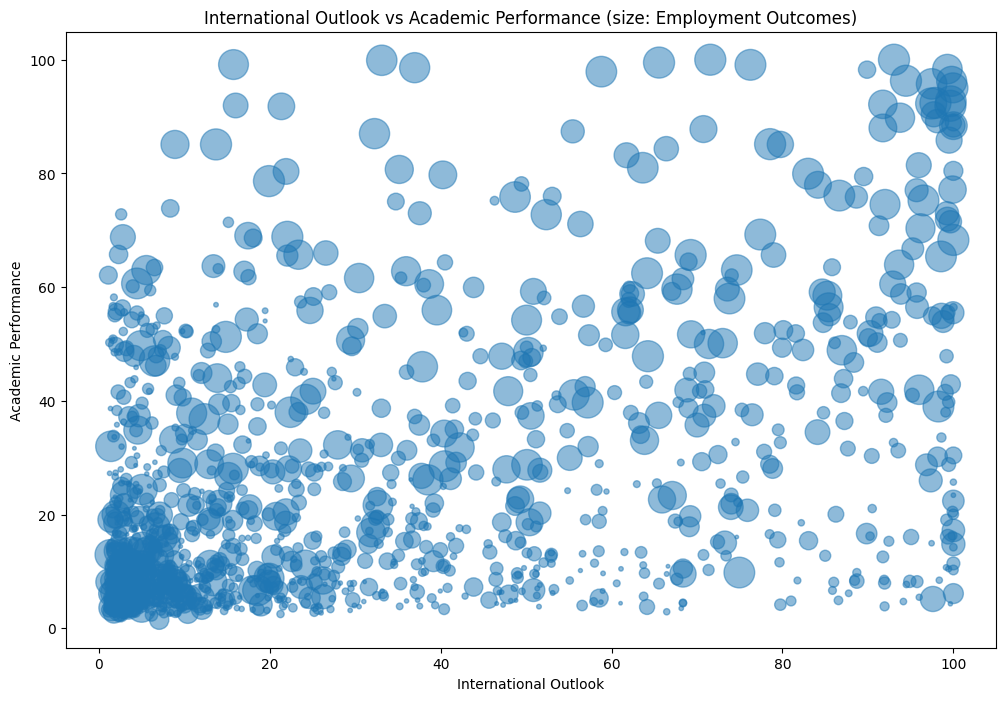

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(df['International Outlook'], df['Academic Performance'],
            s=df['Employment Outcomes']*5, alpha=0.5)
plt.xlabel('International Outlook')
plt.ylabel('Academic Performance')
plt.title('International Outlook vs Academic Performance (size: Employment Outcomes)')
plt.show()

> This is excecuted well but hard to interpret. I am not sure these three variables are good to visualize this way. 

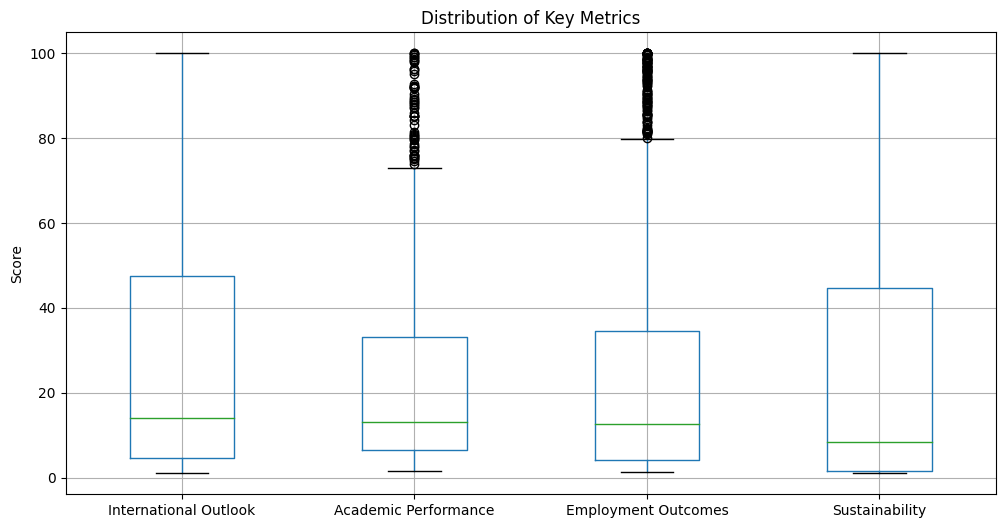

In [17]:
plt.figure(figsize=(12, 6))
df.boxplot(column=['International Outlook', 'Academic Performance',
                   'Employment Outcomes', 'Sustainability'])
plt.title('Distribution of Key Metrics')
plt.ylabel('Score')
plt.show()

> I like the idea of boiling it down to key metrics, but this does not tell us anything about quality of school or how to select a school. Ideally we would find a way to connect this back to schools or locations. 